## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 3

In [2]:
from sklearn.datasets import make_friedman1
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

n_points = 1000
x, y = make_friedman1 (n_samples=n_points, n_features=10, noise=5, random_state=100)
x_train , x_test , y_train , y_test = train_test_split (x, y, test_size=0.33 , random_state=100)

Highest R2 score and optimal m:
 m     8.000000
r2    0.411193
Name: 7, dtype: float64


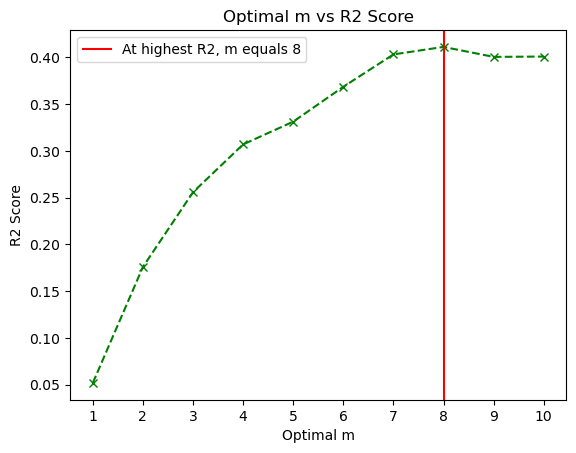

In [3]:
r2 = -float("inf")
reading_df = pd.DataFrame(columns=["m", "r2"])

for i in range(0, x.shape[1]):
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, max_features=i+1, random_state=100)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    reading_df = reading_df._append({"m": i+1, "r2": r2_score(y_test, y_pred)}, ignore_index=True)
print("Highest R2 score and optimal m:\n", reading_df.loc[reading_df["r2"].idxmax()])

plt.plot(reading_df["m"], reading_df["r2"], marker="x", color="green", linestyle="--")
plt.xticks(reading_df["m"])
plt.axvline(x=reading_df.loc[reading_df["r2"].idxmax(), "m"], color="red", label=f"""At highest R2, m equals {int(reading_df.loc[reading_df["r2"].idxmax(), "m"])}""")
plt.title("Optimal m vs R2 Score")
plt.xlabel("Optimal m")
plt.ylabel("R2 Score")
plt.legend()
plt.savefig("Q3.png", bbox_inches="tight")
plt.show()

## Question 4

Lowest zero-one loss and Gamma level:
 gamma    0.10000
loss     0.00303
Name: 0, dtype: float64


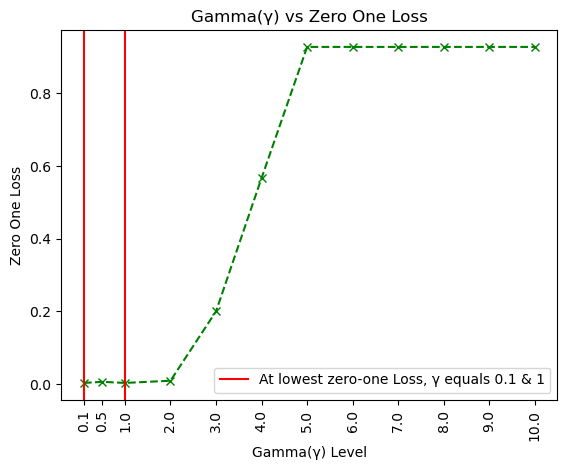

In [4]:
from sklearn.datasets import make_blobs
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

reading_df = pd.DataFrame(columns=["gamma", "loss"])

if __name__ == "__main__":
    x, y = make_blobs(n_samples=1000, n_features=20, centers=2, random_state=100, cluster_std=6)
    x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.33 , random_state=10)
    
    for g in [0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
        model = GradientBoostingClassifier(n_estimators=80, learning_rate=g)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        reading_df = reading_df._append({"gamma": g, "loss": zero_one_loss(y_test, y_pred)}, ignore_index=True)
    print("Lowest zero-one loss and Gamma level:\n", reading_df.loc[reading_df["loss"].idxmin()])

    plt.plot(reading_df["gamma"], reading_df["loss"], marker="x", color="green", linestyle="--")
    plt.xticks(reading_df["gamma"])
    plt.axvline(x=0.1, color="red", label="At lowest zero-one Loss, γ equals 0.1 & 1")
    plt.axvline(x=1, color="red")
    plt.title("Gamma(γ) vs Zero One Loss")
    plt.xlabel("Gamma(γ) Level")
    plt.xticks(rotation=90)
    plt.ylabel("Zero One Loss")
    plt.legend()
    plt.savefig("Q4.png", bbox_inches="tight")
    plt.show()

## Question 5

### a)

In [5]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Hitters(1).csv")
df.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N


In [6]:
encoder = LabelEncoder()
df["League"] = encoder.fit_transform(df["League"])
df["Division"] = encoder.fit_transform(df["Division"])
df["NewLeague"] = encoder.fit_transform(df["NewLeague"])
df.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1


### c)

Lowest cross-val MSE and principal components:
 PC             18.000000
mseloss    115083.911541
Name: 17, dtype: float64


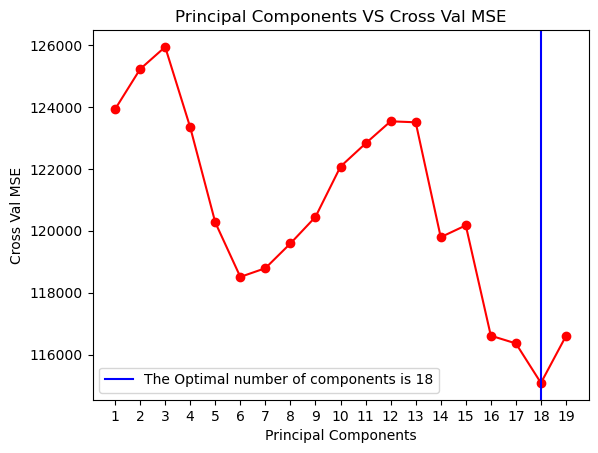

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

x = df.drop("Salary", axis=1)
y = df["Salary"]

x = StandardScaler().fit_transform(x)
x = PCA().fit_transform(x)

reading_df = pd.DataFrame(columns=["PC", "mseloss"])
for i in range(1, x.shape[1]+1):    
    df_features = PCA(n_components=i).fit_transform(x)
    model = LinearRegression()
    mseloss = abs(np.mean(cross_val_score(model, df_features, y, cv=10, scoring="neg_mean_squared_error")))
    reading_df = reading_df._append({"PC": i, "mseloss": mseloss}, ignore_index=True)
print("Lowest cross-val MSE and principal components:\n", reading_df.loc[reading_df["mseloss"].idxmin()])

plt.plot(reading_df["PC"], reading_df["mseloss"], marker="o", color="red")
plt.xticks(reading_df["PC"])
plt.axvline(x=reading_df.loc[reading_df["mseloss"].idxmin(), "PC"], color="blue", label=f"""The Optimal number of components is {int(reading_df.loc[reading_df["mseloss"].idxmin(), "PC"])}""")
plt.xlabel("Principal Components")
plt.ylabel("Cross Val MSE")
plt.title("Principal Components VS Cross Val MSE")
plt.legend()
plt.savefig("Q5c.png", bbox_inches="tight")
plt.show()

### d)

Lowest cross-val MSE and Lambda:
 alpha         120.000000
mseloss    113366.615176
Name: 11, dtype: float64


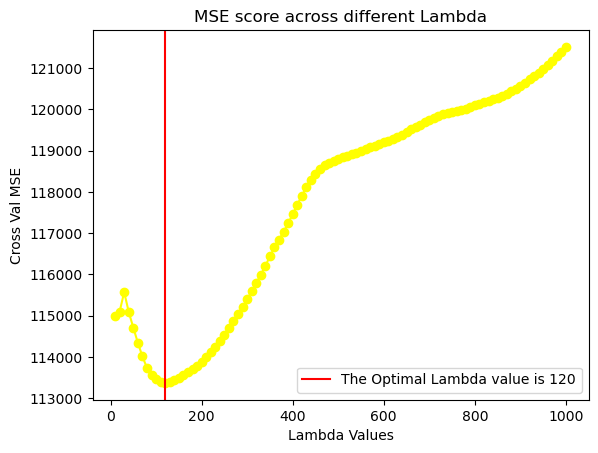

In [8]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

x = df.drop("Salary", axis=1)
y = df["Salary"]

alphas = list(range(10, 1001, 10))

reading_df = pd.DataFrame(columns=["alpha", "mseloss"])
for alpha in alphas:
    model = Lasso(alpha=alpha)
    mseloss = abs(np.mean(cross_val_score(model, x, y, cv=10, scoring="neg_mean_squared_error")))
    reading_df = reading_df._append({"alpha": alpha, "mseloss": mseloss}, ignore_index=True)
print("Lowest cross-val MSE and Lambda:\n", reading_df.loc[reading_df["mseloss"].idxmin()])

plt.plot(reading_df["alpha"], reading_df["mseloss"], color="yellow", marker="o")
plt.axvline(x=reading_df.loc[reading_df["mseloss"].idxmin(), "alpha"], color="red", label=f"""The Optimal Lambda value is {int(reading_df.loc[reading_df["mseloss"].idxmin(), "alpha"])}""")
plt.xlabel("Lambda Values")
plt.ylabel("Cross Val MSE")
plt.title("MSE score across different Lambda")
plt.legend()
plt.savefig("Q5d.png", bbox_inches="tight")
plt.show()

## Question 6

In [9]:
import statsmodels.api as sm

df = pd.read_csv("ships(1).csv")

### a)

In [10]:
x = df[["type", "construction", "operation", "months"]]
y = df["damage"]

model = sm.GLM(y, x, family=sm.families.Poisson()).fit()
print("Coefficients:\n", model.params)
print("95% Confidence Interval:\n", model.conf_int(alpha=0.05))

Coefficients:
 type           -0.223703
construction    0.371445
operation       0.767995
months          0.000081
dtype: float64
95% Confidence Interval:
                      0         1
type         -0.317121 -0.130284
construction  0.254601  0.488289
operation     0.566527  0.969464
months        0.000075  0.000087


### b)

In [11]:
coefficient_df = pd.DataFrame(columns=["type", "construction", "operation", "months"])
for i in range(1000):
    bootstrap_df = df.sample(frac=1, replace=True)
    x = bootstrap_df[["type", "construction", "operation", "months"]]
    y = bootstrap_df["damage"]
    model = sm.GLM(y, x, family=sm.families.Poisson()).fit()
    coefficients = model.params.values
    coefficient_df = coefficient_df._append({"type": coefficients[0], "construction": coefficients[1], "operation": coefficients[2], "months": coefficients[3]}, ignore_index=True)

se = coefficient_df.std()
print("The Standard Error is:\n", se)

lower_bound = coefficient_df.mean() - 1.96 * (se / len(coefficient_df) ** 0.5)
upper_bound = coefficient_df.mean() + 1.96 * (se / len(coefficient_df) ** 0.5)
print("The Lower Limit is:\n", lower_bound)
print("The Upper Limit is:\n", upper_bound)

The Standard Error is:
 type            0.126335
construction    0.165507
operation       0.365726
months          0.000031
dtype: float64
The Lower Limit is:
 type           -0.213188
construction    0.395907
operation       0.585888
months          0.000095
dtype: float64
The Upper Limit is:
 type           -0.197528
construction    0.416424
operation       0.631224
months          0.000099
dtype: float64


## Question 7

In [12]:
df = pd.read_csv("softdrink.csv")

### a)

In [13]:
x = df[["Cases", "Distance"]]
y = df["Time"]

model = sm.OLS(y, x).fit()
print("Fitted model:", "Time = (", model.params[0], "* Cases ) + (", model.params[1], "* Distance )")
print("Residual Standard Deviation:", model.resid.std())
print("P-values:")
print(model.pvalues)

Fitted model: Time = ( 1.7079018042014529 * Cases ) + ( 0.01611513146598973 * Distance )
Residual Standard Deviation: 3.323160419363028
P-values:
Cases       1.577509e-09
Distance    2.950177e-04
dtype: float64


### b)

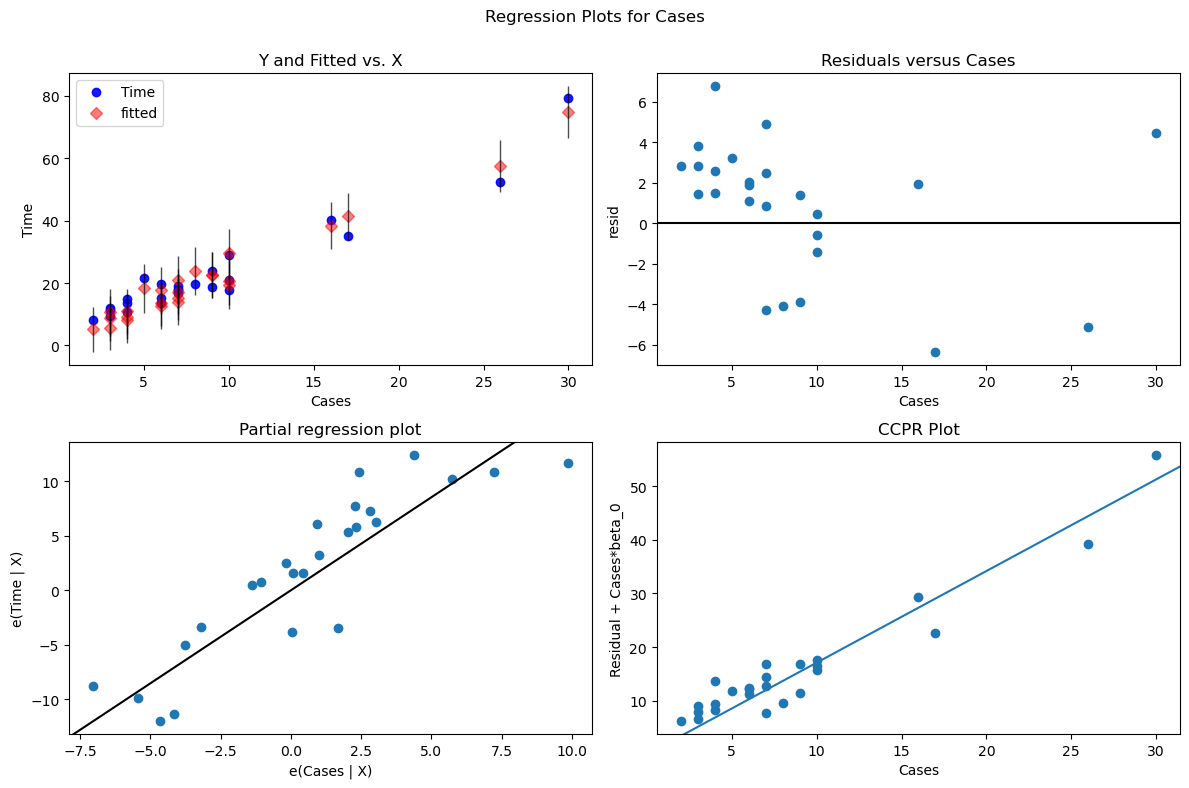

In [14]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "Cases", fig=fig)
plt.savefig("Q7bcases.png", bbox_inches="tight")
plt.show()

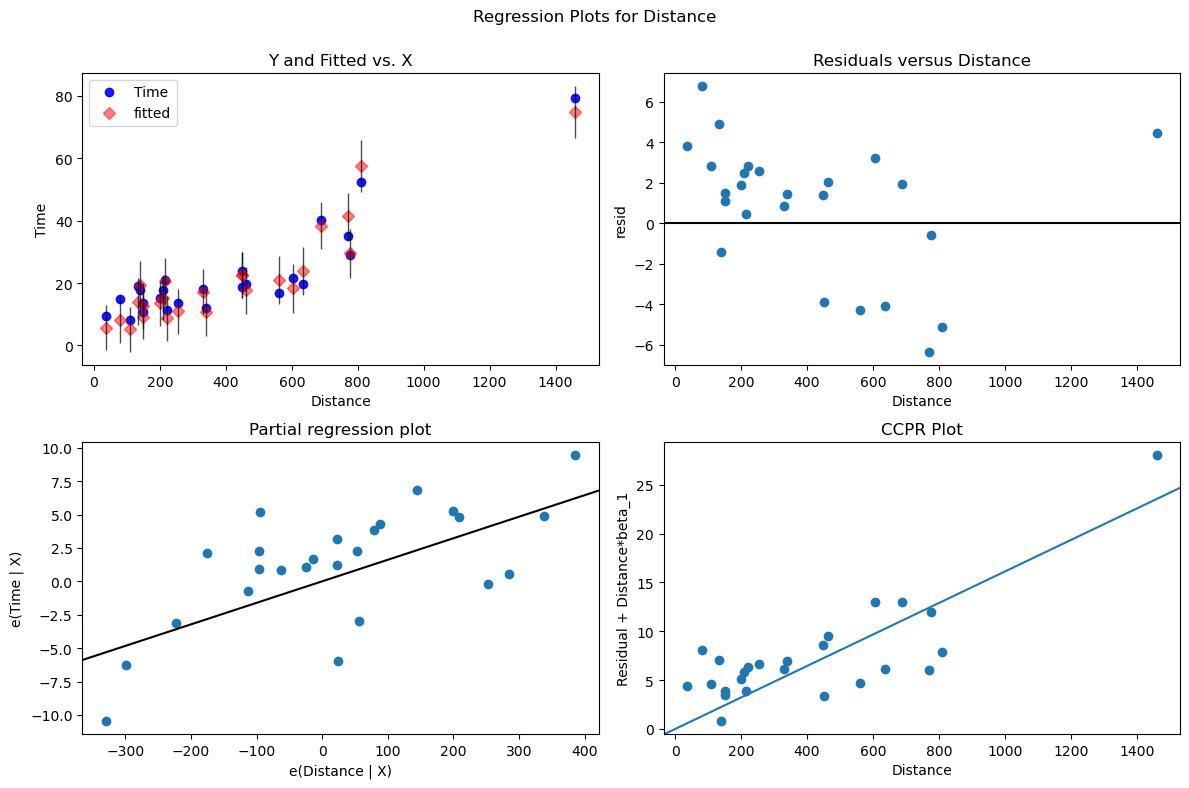

In [15]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "Distance", fig=fig)
plt.savefig("Q7bdistance.png", bbox_inches="tight")
plt.show()

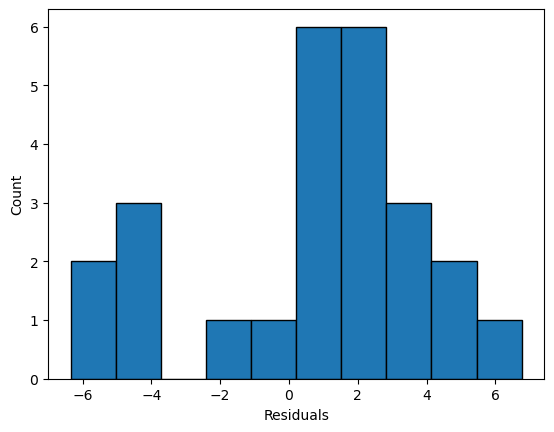

In [16]:
plt.hist(model.resid, edgecolor = "black")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.savefig("Q7bhistogram.png", bbox_inches="tight")
plt.show()

### c)

Most influential observation: 21


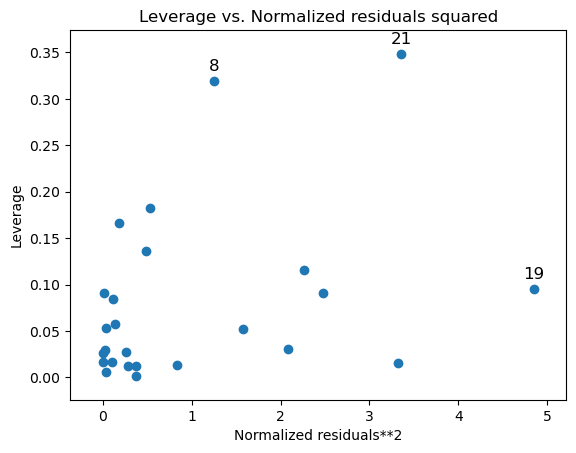

In [17]:
influence = model.get_influence()
distance = influence.cooks_distance[0]
observation = np.argmax(distance)
print("Most influential observation:", observation)

fig, ax = plt.subplots()
sm.graphics.plot_leverage_resid2(model, ax=ax)
plt.savefig("Q7c.png", bbox_inches="tight")
plt.show()

## References


Creating residual plots using statsmodels. (n.d.). Stack Overflow. https://stackoverflow.com/questions/64755934/creating-residual-plots-usin--statsmodels


Linear, lasso, and ridge regression with scikit-learn. (n.d.). Online Courses, Learning Paths, and Certifications - Pluralsight. https://www.pluralsight.com/resources/blog/guides/linear-lasso-ridge-regression-scikit-learn

Prabhakaran, S. (2023, August 9). Cook’s distance for detecting influential observations. Machine Learning Plus. https://www.machinelearningplus.com/machine-learning/cooks-distance/

Principal component analysis (PCA) with scikit-learn. (n.d.). KDnuggets. https://www.kdnuggets.com/2023/05/principal-component-analysis-pca-scikitlearn.html

Python statsmodels.glm - TypeError when family=Poisson(). (n.d.). Stack Overflow. https://stackoverflow.com/questions/50703000/python-statsmodels-glm-typeerror-when-family-poisson

Sklearn.ensemble.GradientBoostingClassifier. (n.d.). scikit-learn. Retrieved April 17, 2024, from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html